In [2]:
import import_ipynb
from Model_Functions import *

# 8. K-Nearest Neighbor for Personalized Cancer Diagnosis

In [3]:
from sklearn.neighbors import KNeighborsClassifier

### 8.1 Training KNN model

K-nearest neighbor does not work well with high dimension. So here we don't prefer using One hot encoding for KNN. We will use Response coding insted.

In [4]:
alpha = [x for x in range(2,20,3)]
logloss_cv = []
for i in alpha:
    print('For alpha =', i)
    algo = KNeighborsClassifier(n_neighbors=i)
    algo.fit(train_x_responseCoding, y_train)
    sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
    sigmoid_clf.fit(train_x_responseCoding, y_train)
    # To avoid rounding error while multiplying probabilites we use log-probability estimates
    sigmoid_clf_probs = sigmoid_clf.predict_proba(cv_x_responseCoding)
    logloss_cv.append(log_loss(cv_y, sigmoid_clf_probs, labels=algo.classes_, eps=1e-15))
    
    print("Log Loss :",log_loss(cv_y, sigmoid_clf_probs))

For alpha = 2
Log Loss : 1.1103682826540564
For alpha = 5
Log Loss : 1.0715424339377684
For alpha = 8
Log Loss : 1.1082801438554508
For alpha = 11
Log Loss : 1.131363885888517
For alpha = 14
Log Loss : 1.1479143522504174
For alpha = 17
Log Loss : 1.1620625872559327


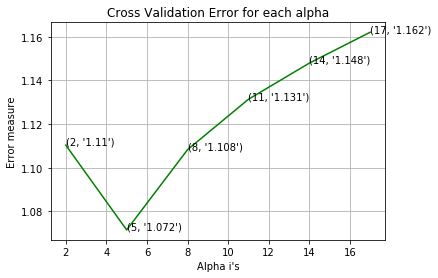

In [5]:
fig, ax = plt.subplots()
ax.plot(alpha, logloss_cv, c='g')
for i, txt in enumerate(np.round(logloss_cv, 3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i], logloss_cv[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [6]:
best_alpha = np.argmin(logloss_cv)
algo = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
algo.fit(train_x_responseCoding, y_train)
sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
sigmoid_clf.fit(train_x_responseCoding, y_train)

CalibratedClassifierCV(base_estimator=KNeighborsClassifier())

In [7]:
predict_y = sigmoid_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=algo.classes_, eps=1e-15))

For values of best alpha =  5 The train log loss is: 0.44811280282804694
For values of best alpha =  5 The cross validation log loss is: 1.0715424339377684
For values of best alpha =  5 The test log loss is: 1.1377324616280378


### 8.2 Testing KNN model

Log loss : 1.0715424339377684
Mis-classified points : 34.962406015037594 %


------------------------------ Confusion matrix ------------------------------



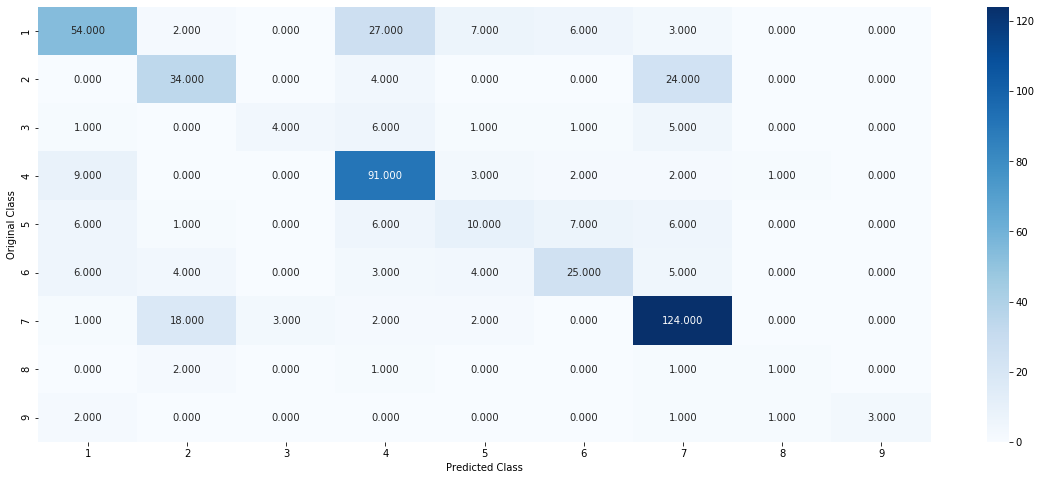



------------------------------ Precision matrix (Columm Sum=1) ------------------------------



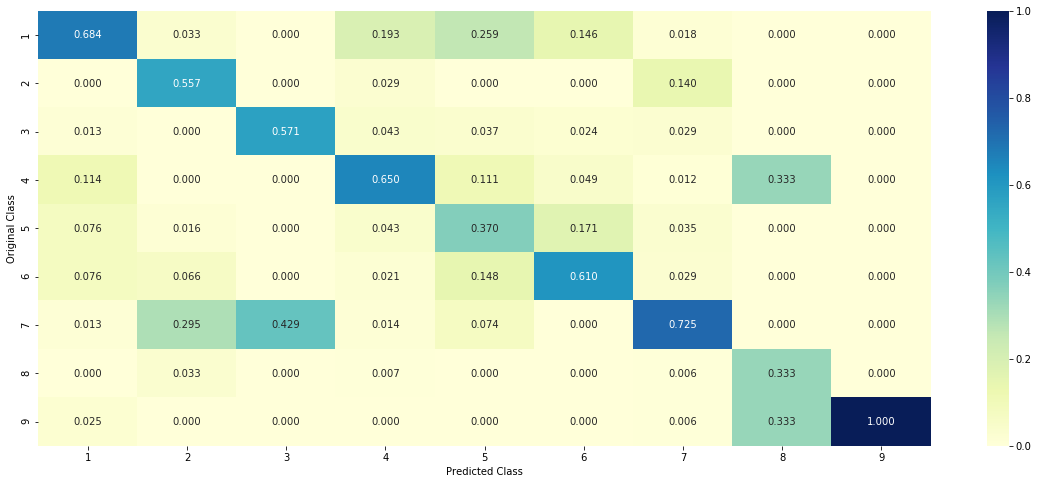



------------------------------ Recall matrix (Row sum=1) ------------------------------



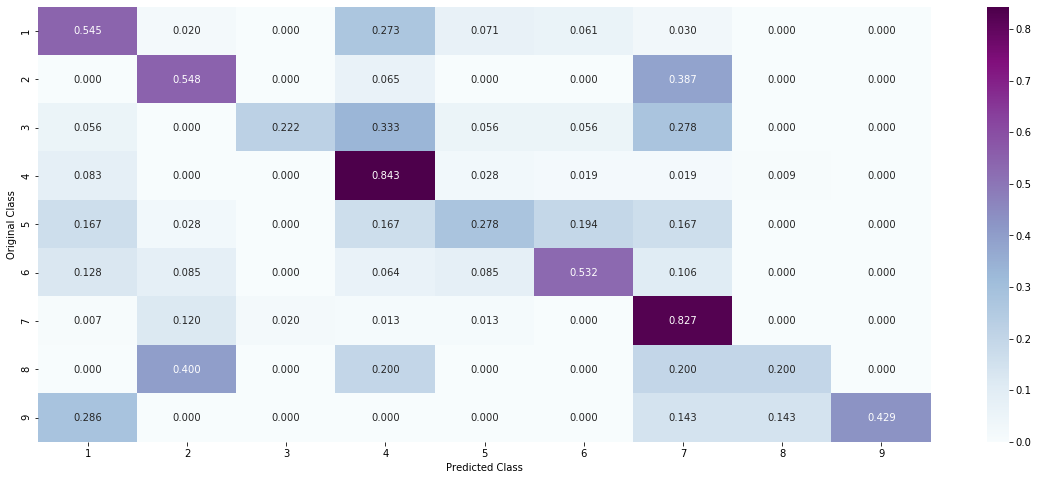

In [8]:
algo = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, y_train, cv_x_responseCoding, y_cv, algo)

Though the errors are quite considerable and K-nearest neighbor is quite stable, we do not prefer KNN for sensitive analysis like Personalized Cancer Diagnosis. This is because KNN is not interpretable by default but for such sensitive cases model interpretability is quite necessary.